#### https://www.kaggle.com/snowsky/gender-recognition-by-voice

In [39]:
import numpy as np
import pandas as pd
from subprocess import check_output
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
csv_files = {'train':'train_vad.csv', 'test':'test_vad.csv'}

In [18]:
df_train = pd.read_csv(csv_files['train'])
df_train = df_train.drop(columns=['sound.files', 'duration'])
df_train.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.069760,0.092657,0.020465,0.005581,0.109767,0.104186,5.431045,39.811680,0.826134,0.418953,...,0.069760,0.172705,0.036117,0.202532,0.551758,0.304688,1.171875,0.867188,0.292149,child
1,0.107726,0.095311,0.099281,0.012353,0.190784,0.178431,5.473482,38.987176,0.929011,0.690661,...,0.107726,0.226449,0.136752,0.275862,0.813879,0.445312,1.281250,0.835938,0.377921,child
2,0.135659,0.080247,0.106821,0.076069,0.209326,0.133256,1.081528,3.508639,0.963765,0.764865,...,0.135659,0.181064,0.041344,0.266667,1.051432,0.414062,1.734375,1.320312,0.423669,child
3,0.208981,0.081661,0.241552,0.188060,0.268299,0.080239,3.414386,17.344207,0.886398,0.506294,...,0.208981,0.188685,0.126984,0.222222,0.471354,0.351562,0.757812,0.406250,0.399038,child
4,0.208771,0.072472,0.234876,0.186281,0.263802,0.077521,2.755505,11.134364,0.883219,0.503064,...,0.208771,0.162924,0.028881,0.190476,0.812500,0.585938,1.101562,0.515625,0.460606,child


In [19]:
df_test = pd.read_csv(csv_files['test'])
df_test = df_test.drop(columns=['sound.files', 'duration'])
df_test.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.225199,0.066435,0.249773,0.219545,0.267803,0.048258,2.927013,12.167927,0.858395,0.417524,...,0.225199,0.188293,0.031250,0.275862,1.004972,0.000000,5.718750,5.718750,0.144657,child
1,0.253216,0.038139,0.264252,0.249273,0.274239,0.024966,3.723604,18.817111,0.766713,0.150553,...,0.253216,0.208720,0.023155,0.275862,0.968359,0.000000,3.531250,3.531250,0.222287,child
2,0.205868,0.072096,0.233010,0.203945,0.249481,0.045536,3.074780,13.509514,0.866908,0.391388,...,0.205868,0.224472,0.128000,0.271186,0.897949,0.234375,4.851562,4.617188,0.180598,child
3,0.197341,0.064822,0.224982,0.176351,0.237263,0.060912,3.740208,19.817440,0.895382,0.497791,...,0.197341,0.197281,0.057971,0.250000,1.431250,0.453125,6.484375,6.031250,0.284974,child
4,0.205682,0.060251,0.228571,0.200000,0.236923,0.036923,4.294896,25.418551,0.869554,0.438868,...,0.205682,0.206830,0.102564,0.250000,0.791360,0.242188,3.203125,2.960938,0.164248,child


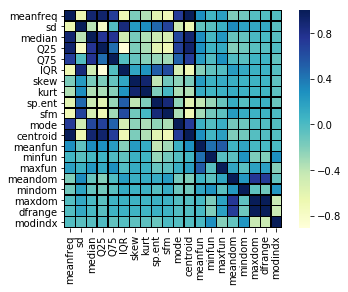

In [12]:
corrmat=df_train.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

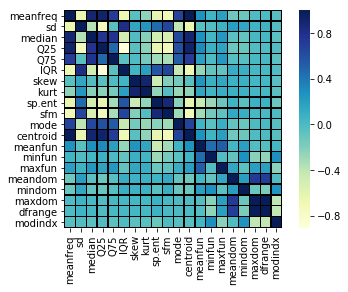

In [13]:
corrmat=df_test.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

In [15]:
# Name of the columns
col_names = list(df_train.columns.values)
print(col_names)
print (type(df_train.columns.values))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>


In [40]:
def plot_cm(y_true, y_pred, desc = None):
    labels = ["child", "female", "male"]
    mat = confusion_matrix(y_true, y_pred, labels=labels)
    accuracy = accuracy_score(y_true, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=labels,
                yticklabels=labels)
    if desc != None:
        plt.title('{}:{}'.format(desc, accuracy))
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()

C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


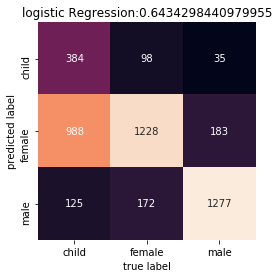

Accuracy1 : 0.7244900022239744
Accuracy2 : 0.6434298440979955


In [41]:
#Lets use logistic Regression:

#Producing X and y
X_train = np.array(df_train.drop(['label'], 1))
y_train = np.array(df_train['label'])

X_test = np.array(df_test.drop(['label'], 1))
y_test = np.array(df_test['label'])

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
plot_cm(y_test, y_pred, desc = 'logistic Regression')
print('Accuracy1 :',model.score(X_train,y_train))
print('Accuracy2 :',model.score(X_test,y_test))

In [42]:
#KNN Classifier
#Producing X and y
X_train = np.array(df_train.drop(['label'], 1))
y_train = np.array(df_train['label'])

X_test = np.array(df_test.drop(['label'], 1))
y_test = np.array(df_test['label'])

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Accuracy='+str(accuracy))

Accuracy=0.5287305122494432


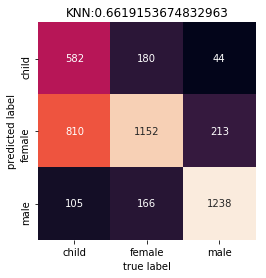

Accuracy2=0.6619153674832963


In [44]:
# fine tune KNN
df_train1=df_train[['meanfreq','sd','median','meanfun','label']]
X_train1 = np.array(df_train1.drop(['label'], 1))
y_train1 = np.array(df_train1['label'])

df_test1=df_test[['meanfreq','sd','median','meanfun','label']]
X_test1 = np.array(df_test1.drop(['label'], 1))
y_test1 = np.array(df_test1['label'])


model = neighbors.KNeighborsClassifier()
model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)
plot_cm(y_test1, y_pred1, desc = 'KNN')

accuracy2 = model.score(X_test1, y_test1)
print('Accuracy2='+str(accuracy2))

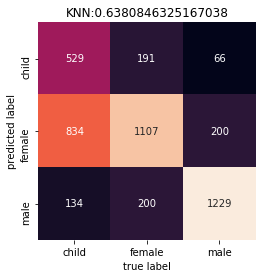

Accuracy=0.6380846325167038


In [47]:
df_train2=df_train[['meanfreq','sd','meanfun','label']]
X_train2 = np.array(df_train2.drop(['label'], 1))
y_train2 = np.array(df_train2['label'])

df_test2=df_test[['meanfreq','sd','meanfun','label']]
X_test2 = np.array(df_test2.drop(['label'], 1))
y_test2 = np.array(df_test2['label'])

model = neighbors.KNeighborsClassifier()
model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)
plot_cm(y_test2, y_pred2, desc = 'KNN')

accuracy2 = model.score(X_test2, y_test2)
print('Accuracy='+str(accuracy2))

In [48]:
# Improving the model using feature_selection from sklearn
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame, target, k=5):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores
k=select_kbest_clf(df_train, 'label', k=5).sort_values(['F Score'],ascending=False)

k

,F Score,P Value,Support,Attribute
12,14031.387153,0.000000e+00,True,meanfun
14,9555.801207,0.000000e+00,True,maxfun
1,3559.869975,0.000000e+00,True,sd
0,3492.887715,0.000000e+00,True,meanfreq
11,3492.887715,0.000000e+00,True,centroid
3,3352.928578,0.000000e+00,False,Q25
2,3342.705819,0.000000e+00,False,median
5,2826.285627,0.000000e+00,False,IQR
6,2589.689229,0.000000e+00,False,skew
7,2299.868344,0.000000e+00,False,kurt


Text(0.5, 1.0, 'Feature Importance')

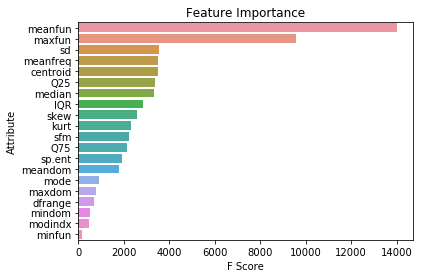

In [49]:
k1=sns.barplot(x=k['F Score'],y=k['Attribute'])
k1.set_title('Feature Importance')

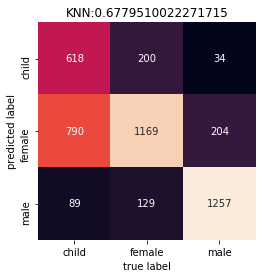

Accuracy3=0.6779510022271715


In [53]:
df_train3=df_train[['meanfun','maxfun', 'sd', 'meanfreq','centroid','Q25','median', 'label']]
df_test3=df_test[['meanfun','maxfun', 'sd', 'meanfreq','centroid','Q25','median', 'label']]

X_train3 = np.array(df_train3.drop(['label'], 1))
y_train3 = np.array(df_train3['label'])

X_test3 = np.array(df_test3.drop(['label'], 1))
y_test3 = np.array(df_test3['label'])

model = neighbors.KNeighborsClassifier()
model.fit(X_train3, y_train3)

y_pred3 = model.predict(X_test3)
plot_cm(y_test3, y_pred3, desc = 'KNN')

accuracy3 = model.score(X_test3, y_test3)
print('Accuracy3='+str(accuracy3))

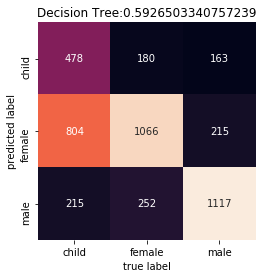

In [65]:
# Decision Tree with Boosting(AdaBoostClassifier)
df_train4 = df_train.replace({'child':0, 'male':1,'female':2})
df_test4 = df_test.replace({'child':0, 'male':1,'female':2})

X_train4 = np.array(df_train4.drop(['label'], 1))
y_train4 = np.array(df_train4['label'])

X_test4 = np.array(df_test4.drop(['label'], 1))
y_test4 = np.array(df_test4['label'])

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
#DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=int(0.5*len(X_train4)))
boosted_dt = AdaBoostClassifier(dt, algorithm='SAMME', n_estimators=800, learning_rate=0.5)
boosted_dt.fit(X_train4,y_train4)

y_predicted = boosted_dt.predict(X_test4)
label = {0:'child', 1:'male', 2:'female'}
y_predicted = [label[i] for i in y_predicted]
y_test4 = [label[i] for i in y_test4]

plot_cm(y_test4, y_predicted, desc = 'Decision Tree')

In [69]:
# Support Vector Machine
from sklearn import svm

df_train5 = df_train.replace({'child':0, 'male':1,'female':2})
df_test5 = df_test.replace({'child':0, 'male':1,'female':2})

X_train5 = np.array(df_train5.drop(['label'], 1))
y_train5 = np.array(df_train5['label'])

X_test5 = np.array(df_test5.drop(['label'], 1))
y_test5 = np.array(df_test5['label'])

In [70]:
#  “one-against-one”
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_train5, y_train5) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

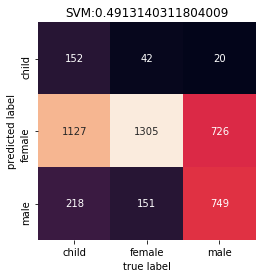

In [74]:
pred = clf.predict(X_test5)
label = {0:'child', 1:'male', 2:'female'}
pred = [label[i] for i in pred]
y_test5 = [label[i] for i in y_test5]
plot_cm(y_test5, pred, desc = 'SVM')

In [71]:
#  “one-vs-the-rest”
lin_clf = svm.LinearSVC(max_iter = 3000)
lin_clf.fit(X_train5, y_train5)

C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

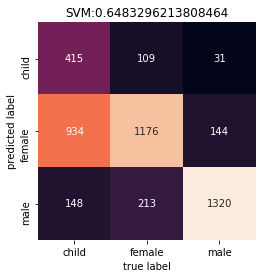

In [76]:
pred = lin_clf.predict(X_test5)
label = {0:'child', 1:'male', 2:'female'}
pred = [label[i] for i in pred]
plot_cm(y_test5, pred, desc = 'SVM')